In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [21]:
shot_log = pd.read_csv('data/shot_logs.csv')
#need to clean for negative touch times 
tt = shot_log[shot_log['TOUCH_TIME'] >= 0 ]


In [3]:
# get just philly games
philly_guys = shot_log[shot_log.iloc[:, 1].str.contains('PHI @|PHI vs.')]
#need to clean for negative touch times 
tt_philly = philly_guys[philly_guys['TOUCH_TIME'] >= 0]
len(philly_guys.groupby("GAME_ID"))

61

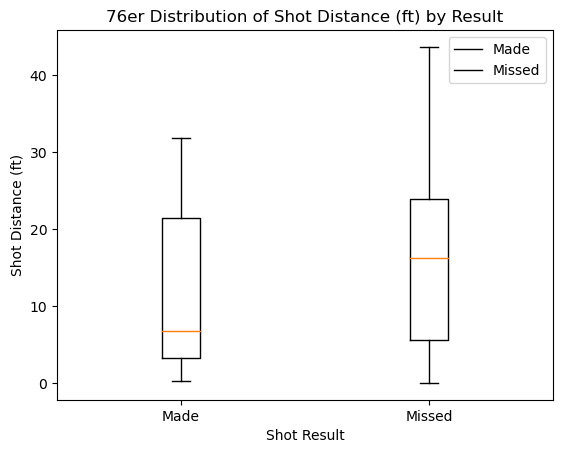

In [4]:
# group by varible and plot by result
grouped_data = philly_guys.groupby('SHOT_RESULT')['SHOT_DIST']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('Shot Distance (ft)')
ax.set_xlabel('Shot Result')
ax.set_title('76er Distribution of Shot Distance (ft) by Result')
ax.legend(['Made', 'Missed'])

plt.show()


In [5]:
# anova for this varible
group0 = philly_guys[philly_guys["SHOT_RESULT"] == 'made']["SHOT_DIST"]
group1 = philly_guys[philly_guys["SHOT_RESULT"] == 'missed']["SHOT_DIST"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=127.10830866999409, pvalue=5.25872505252666e-29)

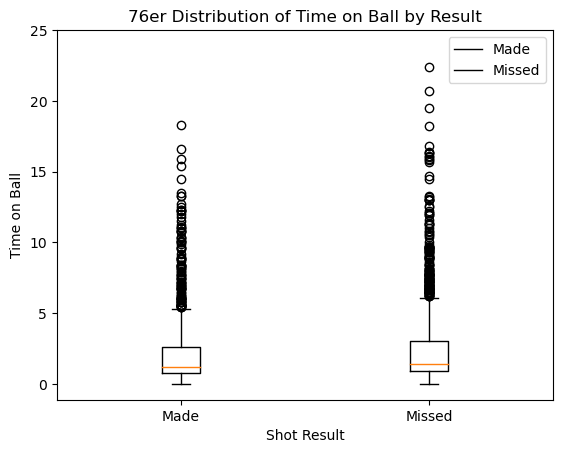

In [6]:
grouped_data = tt_philly.groupby('SHOT_RESULT')['TOUCH_TIME']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('Time on Ball')
ax.set_xlabel('Shot Result')
ax.set_title('76er Distribution of Time on Ball by Result')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 26, 5))  

plt.show()


In [7]:
group0 = tt_philly[tt_philly["SHOT_RESULT"] == 'made']["TOUCH_TIME"]
group1 = tt_philly[tt_philly["SHOT_RESULT"] == 'missed']["TOUCH_TIME"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=8.627044845736286, pvalue=0.003332814859612991)

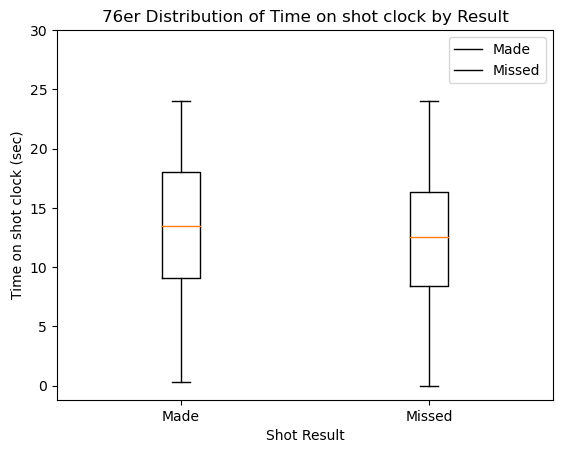

In [8]:
df_cleaned = philly_guys.dropna(subset=['SHOT_CLOCK'])
grouped_data = df_cleaned.groupby('SHOT_RESULT')['SHOT_CLOCK']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('Time on shot clock (sec)')
ax.set_xlabel('Shot Result')
ax.set_title('76er Distribution of Time on shot clock by Result')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 31, 5))  

plt.show()

In [9]:
group0 = df_cleaned[df_cleaned["SHOT_RESULT"] == 'made']["SHOT_CLOCK"]
group1 = df_cleaned[df_cleaned["SHOT_RESULT"] == 'missed']["SHOT_CLOCK"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=41.739922832794925, pvalue=1.1832135332005524e-10)

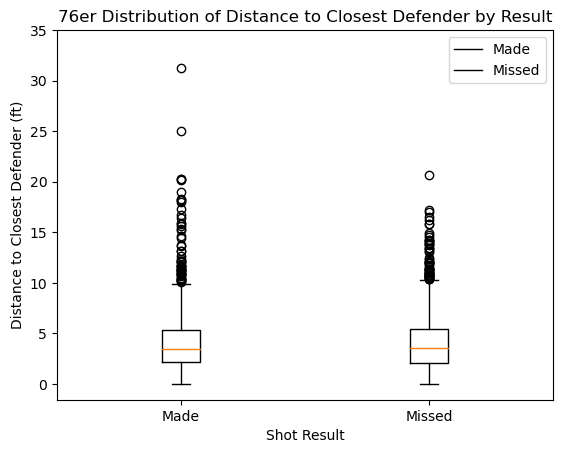

In [10]:
grouped_data = philly_guys.groupby('SHOT_RESULT')['CLOSE_DEF_DIST']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('Distance to Closest Defender (ft)')
ax.set_xlabel('Shot Result')
ax.set_title('76er Distribution of Distance to Closest Defender by Result')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 36, 5))  

plt.show()

In [11]:
group0 = philly_guys[philly_guys["SHOT_RESULT"] == 'made']["CLOSE_DEF_DIST"]
group1 = philly_guys[philly_guys["SHOT_RESULT"] == 'missed']["CLOSE_DEF_DIST"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.03799308646966689, pvalue=0.8454678354397416)

In [12]:
#### LEAGUE WIDE SAME TESTS

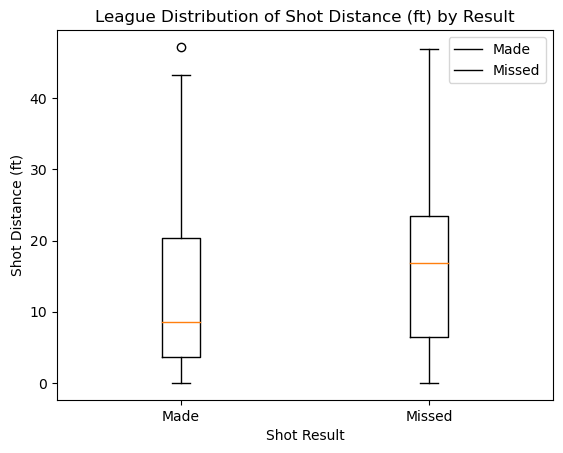

In [18]:
grouped_data = shot_log.groupby('SHOT_RESULT')['SHOT_DIST']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('Shot Distance (ft)')
ax.set_xlabel('Shot Result')
ax.set_title('League Distribution of Shot Distance (ft) by Result')
ax.legend(['Made', 'Missed'])

plt.show()


In [19]:
group0 = shot_log[shot_log["SHOT_RESULT"] == 'made']["SHOT_DIST"]
group1 = shot_log[shot_log["SHOT_RESULT"] == 'missed']["SHOT_DIST"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=4886.059887606935, pvalue=0.0)

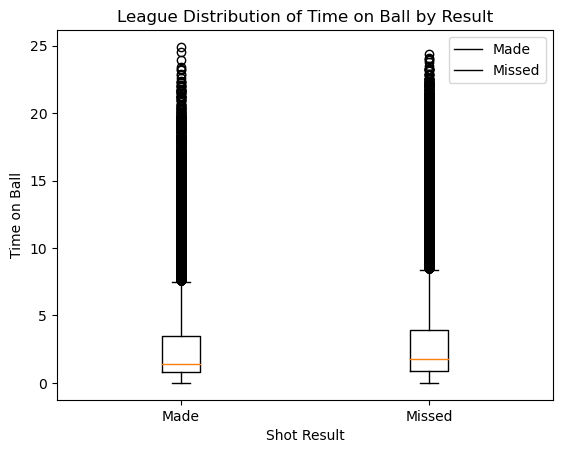

In [24]:
grouped_data = tt.groupby('SHOT_RESULT')['TOUCH_TIME']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('Time on Ball')
ax.set_xlabel('Shot Result')
ax.set_title('League Distribution of Time on Ball by Result')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 26, 5))  

plt.show()

In [23]:
group0 = tt[tt["SHOT_RESULT"] == 'made']["TOUCH_TIME"]
group1 = tt[tt["SHOT_RESULT"] == 'missed']["TOUCH_TIME"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=295.91999991384483, pvalue=3.0303566133998403e-66)

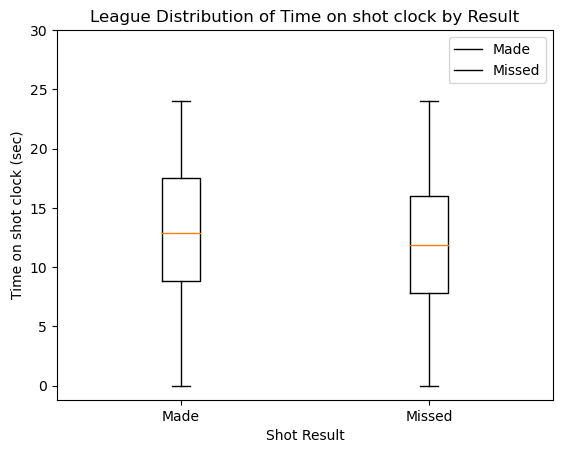

In [25]:
df_cleaned = shot_log.dropna(subset=['SHOT_CLOCK'])
grouped_data = df_cleaned.groupby('SHOT_RESULT')['SHOT_CLOCK']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('Time on shot clock (sec)')
ax.set_xlabel('Shot Result')
ax.set_title('League Distribution of Time on shot clock by Result')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 31, 5))  

plt.show()

In [26]:
group0 = df_cleaned[df_cleaned["SHOT_RESULT"] == 'made']["SHOT_CLOCK"]
group1 = df_cleaned[df_cleaned["SHOT_RESULT"] == 'missed']["SHOT_CLOCK"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=1160.0433625032479, pvalue=4.5331267587269125e-253)

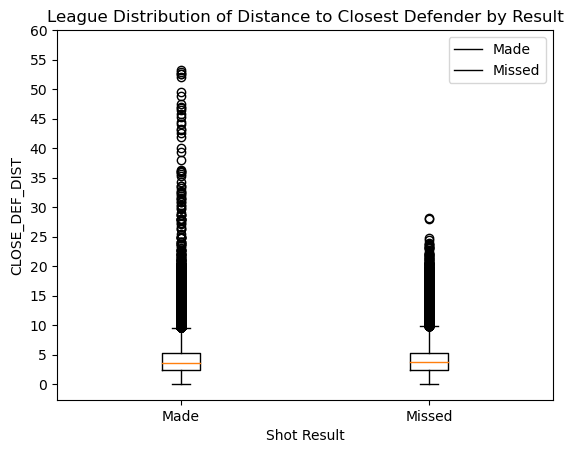

In [27]:
grouped_data = shot_log.groupby('SHOT_RESULT')['CLOSE_DEF_DIST']
data_to_plot = [grouped_data.get_group('made'), grouped_data.get_group('missed')]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot)

ax.set_xticklabels(['Made', 'Missed'])
ax.set_ylabel('CLOSE_DEF_DIST')
ax.set_xlabel('Shot Result')
ax.set_title('League Distribution of Distance to Closest Defender by Result')
ax.legend(['Made', 'Missed'])
plt.yticks(range(0, 61, 5))  

plt.show()

In [28]:
group0 = shot_log[shot_log["SHOT_RESULT"] == 'made']["CLOSE_DEF_DIST"]
group1 = shot_log[shot_log["SHOT_RESULT"] == 'missed']["CLOSE_DEF_DIST"]
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.14785066966757976, pvalue=0.7005984938313635)